Project Description:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


-- Input features-
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


Bussiness/Social Implication:
    Power generation is a complex process, and understanding and predicting power output is an important element in managing a plant and its connection to the power grid.
    it will enalbe grid operator to make economic tradeoffs about the number of peaker plants to turn on (or whether to buy expensive power from another grid
    

Steps to Follow for the Project: The dataset contains 27 features and 907 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [104]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

In [105]:
# Loading the dataset downloaded from kaggle
pplant_dt=pd.read_csv('database_IND.csv')
pplant_dt.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [106]:
pplant_dt.shape # to determine the shape of the dataset

(907, 27)

In [107]:
pplant_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [108]:
# groupby column data types
pplant_dt.columns.groupby(pplant_dt.dtypes)

{float64: ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh'], object: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']}

In [109]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(pplant_dt.columns.groupby(pplant_dt.dtypes).keys())[0], len(pplant_dt.columns.groupby(pplant_dt.dtypes)[list(pplant_dt.columns.groupby(pplant_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(pplant_dt.columns.groupby(pplant_dt.dtypes).keys())[1], len(pplant_dt.columns.groupby(pplant_dt.dtypes)[list(pplant_dt.columns.groupby(pplant_dt.dtypes).keys())[1]])))

No of columns for float64 is 15.
No of columns for object is 12.


In [110]:
pplant_dt = pplant_dt.drop(['country','country_long','gppd_idnr','generation_data_source','url','geolocation_source','owner'],axis = 1)

In [111]:
# Checking for null values
pplant_dt.isnull().sum()

name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
source                        0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

In [112]:
# dropping the null values
pplant_dt=pplant_dt.fillna(0)

In [113]:
pplant_dt.shape

(907, 20)

In [114]:
pplant_dt.tail(10)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
897,Wind power project by Riddhi Siddhi Gluco Biol...,34.65,8.8709,77.4466,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
898,Wind power project in Rajasthan,42.00,27.1715,70.6877,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
899,YAMUNANAGAR TPP,600.00,30.1081,77.3257,Coal,Oil,0,0.0,2007.0,Central Electricity Authority,0.0,2019.0,0.0,3194.35982,3709.552200,3123.572061,3156.053669,3039.66118,0.0,0.0
900,YASHWANTRAO MOHITE,16.00,17.1653,74.2456,Biomass,0,0,0.0,0.0,Yashwantrao Krishna ssk,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
901,YELHANKA (DG),106.60,13.1156,77.5838,Oil,0,0,0.0,1993.0,Central Electricity Authority,0.0,2019.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
902,YERMARUS TPP,1600.00,16.2949,77.3568,Coal,Oil,0,0.0,2016.0,Central Electricity Authority,0.0,2019.0,0.0,0.00000,0.994875,233.596650,865.400000,686.50000,0.0,0.0
903,Yelesandra Solar Power Plant,3.00,12.8932,78.1654,Solar,0,0,0.0,0.0,Karnataka Power Corporation Limited,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
904,Yelisirur wind power project,25.50,15.2758,75.5811,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
905,ZAWAR MINES,80.00,24.3500,73.7477,Coal,0,0,0.0,0.0,Hindustan Zinc ltd,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
906,iEnergy Theni Wind Farm,16.50,9.9344,77.4768,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0


In [115]:
pplant_dt['total_generation'] = pplant_dt['generation_gwh_2013'] + pplant_dt['generation_gwh_2014'] + pplant_dt['generation_gwh_2015'] + pplant_dt['generation_gwh_2016'] + pplant_dt['generation_gwh_2017'] 

In [116]:
pplant_dt = pplant_dt.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1)

In [117]:
pplant_dt.tail(10)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,wepp_id,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,total_generation
897,Wind power project by Riddhi Siddhi Gluco Biol...,34.65,8.8709,77.4466,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.00000,0.0,0.0,0.000000
898,Wind power project in Rajasthan,42.00,27.1715,70.6877,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.00000,0.0,0.0,0.000000
899,YAMUNANAGAR TPP,600.00,30.1081,77.3257,Coal,Oil,0,0.0,2007.0,Central Electricity Authority,0.0,2019.0,3039.66118,0.0,0.0,13183.537750
900,YASHWANTRAO MOHITE,16.00,17.1653,74.2456,Biomass,0,0,0.0,0.0,Yashwantrao Krishna ssk,0.0,0.0,0.00000,0.0,0.0,0.000000
901,YELHANKA (DG),106.60,13.1156,77.5838,Oil,0,0,0.0,1993.0,Central Electricity Authority,0.0,2019.0,0.00000,0.0,0.0,0.000000
902,YERMARUS TPP,1600.00,16.2949,77.3568,Coal,Oil,0,0.0,2016.0,Central Electricity Authority,0.0,2019.0,686.50000,0.0,0.0,1099.991525
903,Yelesandra Solar Power Plant,3.00,12.8932,78.1654,Solar,0,0,0.0,0.0,Karnataka Power Corporation Limited,0.0,0.0,0.00000,0.0,0.0,0.000000
904,Yelisirur wind power project,25.50,15.2758,75.5811,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.00000,0.0,0.0,0.000000
905,ZAWAR MINES,80.00,24.3500,73.7477,Coal,0,0,0.0,0.0,Hindustan Zinc ltd,0.0,0.0,0.00000,0.0,0.0,0.000000
906,iEnergy Theni Wind Farm,16.50,9.9344,77.4768,Wind,0,0,0.0,0.0,CDM,0.0,0.0,0.00000,0.0,0.0,0.000000


In [118]:
# Checking for null values
pplant_dt.isnull().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
source                      0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2018         0
generation_gwh_2019         0
estimated_generation_gwh    0
total_generation            0
dtype: int64

In [119]:
pplant_dt['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [120]:
# Converting BusinessTravel to Integer
embs = {'Solar':0, 'Coal':1, 'Wind':2,'Gas':3,'Hydro':4,'Biomass':5,'Oil':6,'Nuclear':7}
pplant_dt['primary_fuel'] = pplant_dt['primary_fuel'].map(embs)

In [121]:
pplant_dt['primary_fuel'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

# Capacity Ranknig of Overall Power Plant

In [122]:
# create a dataframe
pp_dt=pplant_dt[['name','capacity_mw','primary_fuel','total_generation','commissioning_year','source','year_of_capacity_data']]
pp_dt=pp_dt.sort_values('capacity_mw',ascending=False)
pp_dt

,name,capacity_mw,primary_fuel,total_generation,commissioning_year,source,year_of_capacity_data
880,VINDH_CHAL STPS,4760.0,1,121772.0,2002.0,Central Electricity Authority,2019.0
493,MUNDRA TPP,4620.0,1,107055.0,2010.0,Central Electricity Authority,2019.0
494,MUNDRA UMPP,4000.0,1,98082.0,2012.0,Central Electricity Authority,2019.0
695,SASAN UMPP,3960.0,1,101991.0,2013.0,Central Electricity Authority,2019.0
808,TIRORA TPP,3300.0,1,67734.0,2013.0,Central Electricity Authority,2019.0
...,...,...,...,...,...,...,...
438,Lallian Kalan Solar Power Plant,1.0,0,0.0,0.0,PEDA,0.0
243,Gandhinagar Solar Power Plant,1.0,0,0.0,0.0,Pandit Deendayal Petrolium University (PDPU),0.0
441,Lathi Solar Power Plant,1.0,0,0.0,0.0,Lancosola,0.0
122,Belagau Wind Farm,1.0,2,0.0,0.0,CDM,0.0


In [123]:
fig = px.bar(pp_dt, x='name', y='capacity_mw',title="Capacity Ranknig of Overall Power Plant")
fig.show()

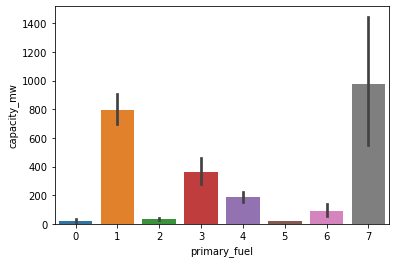

In [124]:
ax = sns.barplot(x="primary_fuel", y="capacity_mw", data=pp_dt)

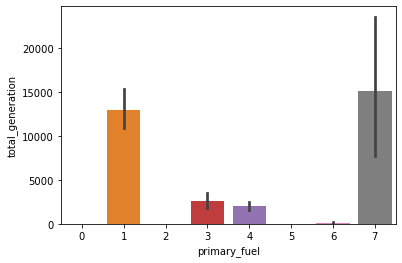

In [125]:
ax = sns.barplot(x="primary_fuel", y="total_generation", data=pp_dt)

In [126]:
!pip install folium

In [127]:
import folium
def plotPointsOnMap(dataframe,beginIndex,endIndex,latitudeColumn,latitudeValue,longitudeColumn,longitudeValue,zoom):
    df = dataframe[beginIndex:endIndex]
    location = [latitudeValue,longitudeValue]
    plot = folium.Map(location=location,zoom_start=zoom)
    for i in range(0,len(df)):
        popup = folium.Popup(str(df.primary_fuel[i:i+1]))
        folium.Marker([df[latitudeColumn].iloc[i],df[longitudeColumn].iloc[i]],popup=popup).add_to(plot)
    return(plot)

In [128]:
India_latitudeLower = pplant_dt['latitude'] > 8
India_latitudeUpper = pplant_dt['latitude'] < 34
India_longitudeLower = pplant_dt['longitude'] > 68
India_longitudeUpper = pplant_dt['longitude'] < 95
India_only = pplant_dt[India_latitudeLower & India_latitudeUpper & India_longitudeLower & India_longitudeUpper]
plotPointsOnMap(India_only,0,800,'latitude',8.1689,'longitude',68.6447,6)

In [129]:
pp_dt.describe()

,capacity_mw,primary_fuel,total_generation,commissioning_year,year_of_capacity_data
count,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,2.368247,4613.755513,1160.382580,1155.304300
std,590.085456,1.729821,12124.189248,985.973139,999.466215
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1.000000,0.000000,0.000000,0.000000
50%,59.200000,2.000000,0.000000,1978.000000,2019.000000
75%,385.250000,4.000000,2980.558746,2003.000000,2019.000000
max,4760.000000,7.000000,121772.000000,2018.000000,2019.000000


# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

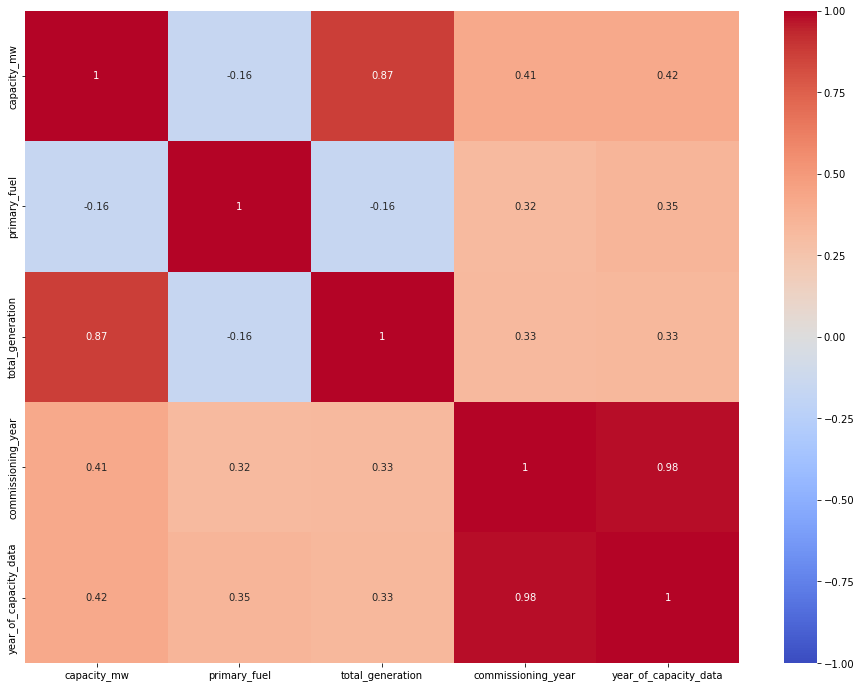

In [130]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(pp_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=pp_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [131]:
# Checking for Outliers
# Checking for skewness of the data to determine outliers
pp_dt.skew()

capacity_mw              3.123576
primary_fuel             0.324360
total_generation         5.089190
commissioning_year      -0.328505
year_of_capacity_data   -0.292409
dtype: float64

In [132]:
pp_dt.isnull().sum()

name                     0
capacity_mw              0
primary_fuel             0
total_generation         0
commissioning_year       0
source                   0
year_of_capacity_data    0
dtype: int64

# Data Preprocessing

In [133]:
# Separating feature data and Label data
# remove the target and redundant features from the dataset
X = pp_dt.drop(['capacity_mw', 'name', 'source'], axis=1)
y= pp_dt['capacity_mw']
X

,primary_fuel,total_generation,commissioning_year,year_of_capacity_data
880,1,121772.0,2002.0,2019.0
493,1,107055.0,2010.0,2019.0
494,1,98082.0,2012.0,2019.0
695,1,101991.0,2013.0,2019.0
808,1,67734.0,2013.0,2019.0
...,...,...,...,...
438,0,0.0,0.0,0.0
243,0,0.0,0.0,0.0
441,0,0.0,0.0,0.0
122,2,0.0,0.0,0.0


In [134]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [135]:
# Converting the continuos variable y to binary values
#y_n = np.where(pp_dt['capacity_mw'] < 50000, 0, 1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((680, 4), (227, 4), (680,), (227,))

In [137]:
pp_dt.isnull().sum()

name                     0
capacity_mw              0
primary_fuel             0
total_generation         0
commissioning_year       0
source                   0
year_of_capacity_data    0
dtype: int64

In [138]:
# dropping the null values
pp_dt=pp_dt.fillna(0)

In [139]:
pp_dt.isnull().sum()

name                     0
capacity_mw              0
primary_fuel             0
total_generation         0
commissioning_year       0
source                   0
year_of_capacity_data    0
dtype: int64

# Build/Test multiple models

In [140]:
#Using Logistic Regression to  train a logistic regression model on the training set

hr_lreg=LinearRegression()
hr_lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = hr_lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(227,)

In [141]:
# Model Accuracy
#lr=metrics.accuracy_score(y_test, y_pred)*100
print("Mean squared error: %.1f" % mean_squared_error(y_test,lreg_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,lreg_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,lreg_pred))
print('\n')

Mean squared error: 57100.4


Mean absolute error: 147.05


R2 Score: 0.81




In [142]:
 #Support Vector Machine
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(X_train,y_train)
#Predicting the test set result
y_pred_svm=svm.predict(X_test)
y_pred_svm.shape

(227,)

In [143]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred_svm))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_svm))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred_svm))
print('\n')

Mean squared error: 317114.4


Mean absolute error: 266.27


R2 Score: -0.08




In [144]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor() #
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred.shape

(227,)

In [145]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,clf_pred))
print('\n')

Mean squared error: 52255.2


Mean absolute error: 111.58


R2 Score: 0.82




In [146]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(X_train, y_train)
et_xgb = xgbreg.predict(X_test)
et_xgb.shape

(227,)

In [147]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,et_xgb))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,et_xgb))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,et_xgb))
print('\n')

Mean squared error: 61718.8


Mean absolute error: 120.20


R2 Score: 0.79




# Cross Validation of all the models on the same dataset for Task 1

In [148]:
k_folds = KFold(n_splits = 5)

In [149]:
LR_scores = cross_val_score(hr_lreg, X_Scalar, y, cv = k_folds)
svm_scores = cross_val_score(svm, X_Scalar, y, cv = k_folds)
clf_scores = cross_val_score(clf, X_Scalar, y, cv = k_folds)
xgbreg_scores= cross_val_score(xgbreg, X_Scalar, y, cv = k_folds)

#print("Cross Validation Scores: ", scores)
print("Average CV Score for Linear Regression is : ", LR_scores.mean()*100)
print('\n')
print("Average CV Score for Support Vector Machine is : ", svm_scores.mean()*100)
print('\n')
print("Average CV Score for Random Forest Regressor  is : ", clf_scores.mean()*100)
print('\n')
print("Average CV Score for Gradient Boosting Classifier is : ", xgbreg_scores.mean()*100)

Average CV Score for Linear Regression is :  -43615.60047752593


Average CV Score for Support Vector Machine is :  -13719.663836181804


Average CV Score for Random Forest Regressor  is :  -5642.540664343669


Average CV Score for Gradient Boosting Classifier is :  -6642.678712074316


In [150]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X,y):
    rmse =- (cross_val_score(model, X,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
          SVR(kernel='rbf'),
         RandomForestRegressor(),
         XGBRegressor(random_state = 0),]
          
          
names = ['LR', 'svm','RF','xgbreg']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

LR  : 9967250.6590, 15611977.620996
svm  : 40078128.2903, 76923459.408064
RF  : 28552334.8733, 48131891.422966
xgbreg  : 28977132.6242, 47480214.199100


# Hyperparameter tuning for Random Foresr Regressor for Task 1

In [151]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [152]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestRegressor(max_depth=3, max_features=None, max_leaf_nodes=9,
                      n_estimators=50)
Best score: 0.809723229938105
Best params: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}


In [153]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([  51.17534135,   51.17534135,  148.98089683,   51.17534135,
         51.17534135,   51.17534135,   51.17534135,  159.44426152,
         51.17534135,   51.17534135,   51.17534135,   51.17534135,
       1198.98818807,  415.86112365,  231.18146919,   51.17534135,
       1206.43992141,   51.17534135,   51.17534135,   51.17534135,
        415.9531866 ,  445.48403928,  392.74667626,   51.17534135,
         97.75918079,   51.17534135,   51.17534135,   51.17534135,
         51.17534135,  261.1884342 , 1218.10383413,   51.17534135,
        416.03728114,   51.17534135,   51.17534135,   74.6384391 ,
         51.17534135,   51.17534135,   83.05327107,   51.17534135,
        783.47356744,  380.1540389 , 1476.07319428, 1218.10383413,
         51.17534135,  159.44426152,  148.98089683, 1206.43992141,
        261.1884342 ,  159.44426152,   51.17534135,   51.17534135,
         51.17534135,   51.17534135,  399.94180751, 1476.07319428,
        612.85907485,  870.43309251,   51.17534135,   51.17534

In [154]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('r2_score:',r2_score(y_pred_grid,y_test)*100)

MSE: 41170.969031259614
MAE: 110.27713353989338
r2_score: 84.33489453721602


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

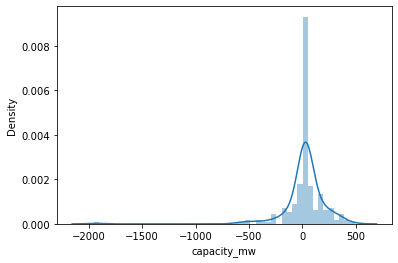

In [155]:
sns.distplot(y_pred_grid-y_test)

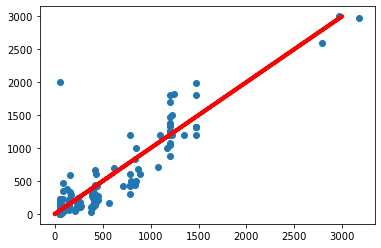

In [156]:
plt.scatter(y_pred_grid,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving the best Model for Task 1

In [157]:
joblib.dump(grid_search.best_estimator_,'CapacityMW_Project.obj')

['CapacityMW_Project.obj']

,Y Test,Pred
773,3.0,51.175341
893,62.4,51.175341
690,120.0,148.980897
51,12.0,51.175341
759,8.5,51.175341


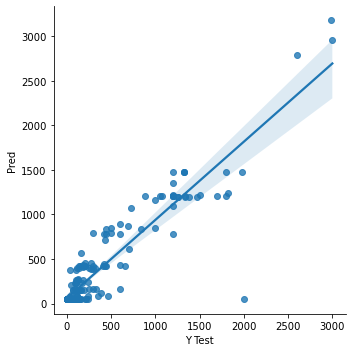

In [158]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data.head()

# Prediction 2 : predicting the Primary Fuel

In [159]:
# Separating feature data and Label data
# remove the target and redundant features from the dataset
X_n = pp_dt.drop(['primary_fuel', 'name', 'source'], axis=1)
y_n= pp_dt['primary_fuel']


In [160]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
Xn_Scalar= stdscalar.fit_transform(X_n)

In [161]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn_Scalar, y, test_size = 0.25,random_state=42)
Xn_train.shape,Xn_test.shape,yn_train.shape,yn_test.shape

((680, 4), (227, 4), (680,), (227,))

In [162]:
# Linear Regression
lreg=LinearRegression()
lreg.fit(Xn_train,yn_train)
y_pred_lreg= lreg.predict(Xn_test)
y_pred_lreg.shape

(227,)

In [163]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yn_test,y_pred_lreg))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yn_test,y_pred_lreg))
print('\n')
print('R2 Score: %.2f' % r2_score(yn_test,y_pred_lreg))
print('\n')

Mean squared error: 0.0


Mean absolute error: 0.00


R2 Score: 1.00




In [164]:
 #Support Vector Machine
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(Xn_train,yn_train)
#Predicting the test set result
y_pred_svm=svm.predict(Xn_test)
y_pred_svm.shape

(227,)

In [165]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yn_test,y_pred_svm))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yn_test,y_pred_svm))
print('\n')
print('R2 Score: %.2f' % r2_score(yn_test,y_pred_svm))
print('\n')

Mean squared error: 301635.1


Mean absolute error: 256.00


R2 Score: -0.03




In [166]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor() #
clf.fit(Xn_train, yn_train)
clf_pred = clf.predict(Xn_test)
clf_pred.shape

(227,)

In [167]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yn_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yn_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(yn_test,clf_pred))
print('\n')

Mean squared error: 266.1


Mean absolute error: 3.49


R2 Score: 1.00




In [168]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(Xn_train, yn_train)
et_xgb = xgbreg.predict(Xn_test)
et_xgb.shape

(227,)

In [169]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yn_test,et_xgb))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yn_test,et_xgb))
print('\n')
print('R2 Score: %.2f' % r2_score(yn_test,et_xgb))
print('\n')

Mean squared error: 146.1


Mean absolute error: 3.58


R2 Score: 1.00




# Cross Validation of all the models on the same dataset for Task 2

In [170]:
k_folds = KFold(n_splits = 6)
LRn_scores = cross_val_score(lreg, X_Scalar, y, cv = k_folds)
svmn_scores = cross_val_score(svm, X_Scalar, y, cv = k_folds)
clfn_scores = cross_val_score(clf, X_Scalar, y, cv = k_folds)
xgbregn_scores= cross_val_score(xgbreg, X_Scalar, y, cv = k_folds)

#print("Cross Validation Scores: ", scores)
print("Average CV Score for Linear Regression is : ", LRn_scores.mean()*100)
print('\n')
print("Average CV Score for Support Vector Machine is : ", svmn_scores.mean()*100)
print('\n')
print("Average CV Score for Random Forest Regressor  is : ", clfn_scores.mean()*100)
print('\n')
print("Average CV Score for Gradient Boosting Classifier is : ", xgbregn_scores.mean()*100)

Average CV Score for Linear Regression is :  -56152.66470042317


Average CV Score for Support Vector Machine is :  -16478.865010904243


Average CV Score for Random Forest Regressor  is :  -7313.898317795456


Average CV Score for Gradient Boosting Classifier is :  -7676.839540885796


In [171]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X_n,y_n):
    rmse =- (cross_val_score(model, X_n,y_n, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
          SVR(kernel='rbf'),
         RandomForestRegressor(),
         XGBRegressor(random_state = 0),]
          
          
names = ['LR', 'svm','RF','xgbreg']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X_n,y_n)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

LR  : 434.5413, 365.914178
svm  : 257.5691, 92.437776
RF  : 344.5296, 242.094636
xgbreg  : 519.9396, 478.800522


# Hyperparameter tuning for extreme gradient boosting

In [172]:
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
et_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
et_grid.fit(Xn_train, yn_train)
print('Best score:', et_grid.best_score_*100)
print('Best score:', et_grid.best_params_)
print('Best score:', et_grid.best_estimator_)

Best score: 99.99796251984458
Best score: {'alpha': 1}
Best score: Ridge(alpha=1)


In [173]:
#xgbreg_grid.fit(X_train,y_train)
pf_PRED=et_grid.best_estimator_.predict(Xn_test)
pf_PRED

array([3.20039300e+00, 6.36426084e+01, 1.21003387e+02, 1.33688843e+01,
       8.66627318e+00, 5.18798579e+00, 3.62938130e+01, 2.50186403e+02,
       1.21280020e+00, 3.46540490e+01, 3.50018777e+01, 1.21280020e+00,
       1.25894818e+03, 6.57356210e+02, 1.72799149e+02, 2.40701173e+01,
       1.79670546e+03, 6.58095660e+01, 1.51259498e+01, 3.52918743e+01,
       1.92948822e+02, 4.20675460e+02, 2.99595536e+02, 5.62482830e+01,
       5.05731758e+01, 3.30142849e+01, 1.13114274e+02, 1.90017557e+01,
       2.13159551e+01, 1.80803234e+02, 1.49909514e+03, 3.13491519e+01,
       4.05198088e+02, 2.25794227e+01, 1.20875023e+02, 2.13225557e+01,
       1.63380623e+01, 1.98781180e+03, 1.20926810e+02, 3.75857483e+01,
       4.21524499e+02, 1.00863682e+02, 1.31860096e+03, 1.19968385e+03,
       1.04054169e+01, 3.29756159e+02, 1.60769877e+02, 1.20076241e+03,
       1.06344418e+02, 9.12265979e+01, 3.33620515e+01, 5.09026200e+01,
       4.95113051e+01, 2.96199177e+01, 2.50555029e+02, 1.19864423e+03,
      

In [174]:
print('MSE:',mean_squared_error(pf_PRED,yn_test))
print('MAE:',mean_absolute_error(pf_PRED,yn_test))
print('r2_score:',r2_score(pf_PRED,yn_test)*100)

MSE: 2.2084451905061226
MAE: 0.8916702730858331
r2_score: 99.99924746240406


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

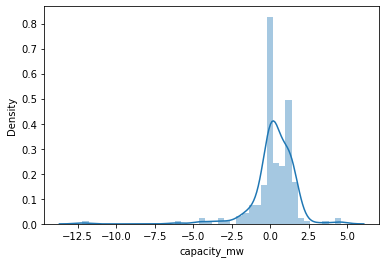

In [175]:
sns.distplot(pf_PRED-yn_test)

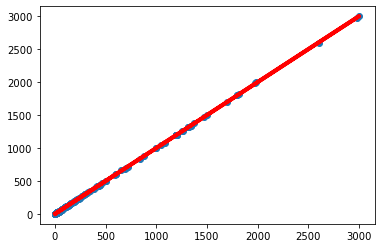

In [176]:
plt.scatter(pf_PRED,yn_test)
plt.plot(yn_test,yn_test,linewidth=4,color='Red')

# Saving the best Model for Task 2

In [177]:
joblib.dump(grid_search.best_estimator_,'primartFuel_Project.obj')

['primartFuel_Project.obj']

,Y Test,Pred
773,3.0,3.200393
893,62.4,63.642608
690,120.0,121.003387
51,12.0,13.368884
759,8.5,8.666273


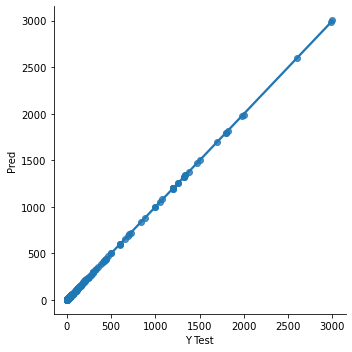

In [178]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':yn_test , 'Pred':pf_PRED},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data.head()

Project Outcome and Conclusion
The Exploratory Data and predictive analysis provided valuable insights into nto the depth of power plants around the world. How the world produces one of the most important elements, as the country's economic and overall infrastructure depends on electricity
We can see that maximum values of Avocado was sold in Year 2015 ee maximum avocado are sold in month 3,4 and 5 months on average sale

After performing all neccesary data preprocessing and employed model such as linearRegression,Support Vector Machine,Random Forest Regressor and Gradient Boosting classifier to train and test the dataset,andomForestRegressor overperfomed others with a better RMSE
Random Forest regressor was hypertuned using Gridsearch technique and the one with the best optimal perfomacnce was choosen to predict the avocado average prrice.

The world is facing global warming, and pollution from power plants is one of the reasons for this. We need to control pollution and urge on countries around the world to build more renewable or green energy power plants.